In [579]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as fit
import seaborn as sns
import datetime as dt

In [580]:
# Load in the dataset containing information of exoplanetary systems:

planetary_system = pd.read_csv('Planetary_System_Data.csv')
column_dict = {'hostname' : 'Host Name',
              'pl_name': 'Planet Name',
              'sy_snum': 'No. of Stars',
              'sy_pnum': 'No. of Planets',
              'sy_mnum': 'No. of Moons',
              'discoverymethod' : 'Discovery Method',
              'disc_year' : 'Discovery Year',
              'pl_orbper' : 'Orbital Period [days]',
              'pl_rade' : 'Planet Radius [Earth Radius]',
              'pl_masse' : 'Planet Mass [Earth Mass]',
              'pl_dens' : 'Planet Density [g/cm**3]',
              'pl_orbeccen' : 'Eccentricity',
              'pl_insol' : 'Insolation Flux [Earth Flux]',
              'pl_eqt' : 'Equilibrium Temperature [K]',
              'st_spectype' : 'Spectral Type',
              'st_teff' : 'Stellar Effective Temperature [K]',
              'st_rad' : 'Stellar Radius [Solar Radius]',
              'st_mass' : 'Stellar Mass [Solar Mass]',
              'st_lum' : 'Stellar Luminosity [log10(Solar)]',
              'st_age' : 'Stellar Age [Gyr]',
              'st_rotp' : 'Stellar Rotational Period [days]',
              'sy_dist' : 'Distance [pc]',
              'st_dens' : 'Stellar Density [g/cm**3]',
              'pl_orbsmax' : 'Orbit Semi-Major Axis [au]',
              'pl_ratdor' : 'Ratio of Semi-Major Axis to Stellar Radius'}

planetary_system.rename(columns = column_dict, inplace = True) # Renaming columns to make it easier to access later on
planetary_system

,Planet Name,Host Name,No. of Stars,No. of Planets,No. of Moons,Discovery Method,Discovery Year,soltype,pl_controv_flag,pl_refname,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,2,1,0,Radial Velocity,2007,Published Confirmed,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
1,11 Com b,11 Com,2,1,0,Radial Velocity,2007,Published Confirmed,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
2,11 Com b,11 Com,2,1,0,Radial Velocity,2007,Published Confirmed,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,0,Radial Velocity,2009,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,1,1,0,Radial Velocity,2009,Published Confirmed,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36552,ups And d,ups And,2,3,0,Radial Velocity,1999,Published Confirmed,0,<a refstr=NAEF_ET_AL__2004 href=https://ui.ads...,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2014-08-21,2004-01,2014-08-21
36553,ups Leo b,ups Leo,1,1,0,Radial Velocity,2021,Published Confirmed,0,<a refstr=TENG_ET_AL__2021 href=https://ui.ads...,...,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,2022-01-10,2021-12,2022-01-10
36554,xi Aql b,xi Aql,1,1,0,Radial Velocity,2007,Published Confirmed,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,...,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837,2014-07-23,2011-08,2014-07-23
36555,xi Aql b,xi Aql,1,1,0,Radial Velocity,2007,Published Confirmed,0,<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,...,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837,2014-05-14,2008-06,2014-05-14


In [581]:
'''
While there are numerous parameters to take into account to determine the habitability of an exoplanet, I will only be considering a few factors,
such as:

1. Stellar Type
2. Ratio of Semi-Major Axis to Stellar Radius
3. Planet Radius (in Earth radii)
4. Planet Mass (in Earth masses)
5. Surface Temperature of the Planet (K)
6. Eccentricity
7. Rotation Period

Through this list of parameters, I will filter the dataset until I end up with a reasonable number of potentially habitable exoplanets. After every
filter, I will plot the data to give a sense of which exoplanets can be considered habitable which exoplanets are the outliers.
'''
# First we must drop all the null values from the desired columns to avoid problem later on: 
column_means = planetary_system[['Orbit Semi-Major Axis [au]','Planet Radius [Earth Radius]','Planet Mass [Earth Mass]','Equilibrium Temperature [K]','Eccentricity','Orbital Period [days]']].mean()
# Fill NaN values with the mean of each column
planetary_system.fillna(column_means, inplace=True)
planetary_system.dropna(subset = ['Spectral Type'], inplace = True)
planetary_system

,Planet Name,Host Name,No. of Stars,No. of Planets,No. of Moons,Discovery Method,Discovery Year,soltype,pl_controv_flag,pl_refname,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
1,11 Com b,11 Com,2,1,0,Radial Velocity,2007,Published Confirmed,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
2,11 Com b,11 Com,2,1,0,Radial Velocity,2007,Published Confirmed,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
5,11 UMi b,11 UMi,1,1,0,Radial Velocity,2009,Published Confirmed,0,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14
6,14 And b,14 And,1,1,0,Radial Velocity,2008,Published Confirmed,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2023-09-19,2023-08,2023-09-19
8,14 And b,14 And,1,1,0,Radial Velocity,2008,Published Confirmed,0,<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36548,ups And d,ups And,2,3,0,Radial Velocity,1999,Published Confirmed,0,<a refstr=MCARTHUR_ET_AL__2010 href=https://ui...,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2021-08-03,2010-06,2021-08-03
36550,ups And d,ups And,2,3,0,Radial Velocity,1999,Published Confirmed,0,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
36551,ups And d,ups And,2,3,0,Radial Velocity,1999,Published Confirmed,0,<a refstr=WITTENMYER_ET_AL__2007 href=https://...,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2014-09-18,2007-01,2014-09-18
36553,ups Leo b,ups Leo,1,1,0,Radial Velocity,2021,Published Confirmed,0,<a refstr=TENG_ET_AL__2021 href=https://ui.ads...,...,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,2022-01-10,2021-12,2022-01-10


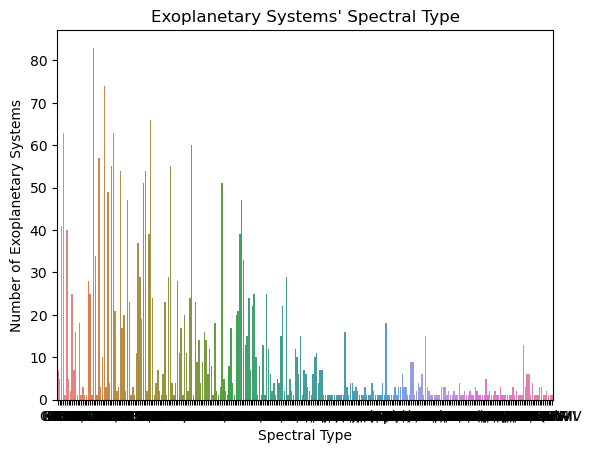

In [582]:
# 1. Filtering exoplanets based on Stellar Type:
# Ideally, we want the type of the star the exoplanet orbits to be the same type as our Sun (G-type), so I will filter the dataset to contain only those
# exoplanets orbiting a G-type star.

sns.countplot(data = planetary_system, x = 'Spectral Type', hue = 'Spectral Type')
plt.title("Exoplanetary Systems' Spectral Type")
plt.xlabel("Spectral Type")
plt.ylabel('Number of Exoplanetary Systems')
plt.show()

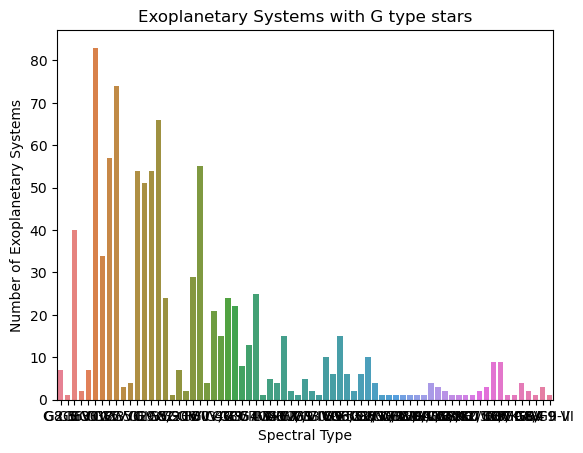

In [583]:
g_type = planetary_system[planetary_system['Spectral Type'].str.startswith('G')]
sns.countplot(data = g_type, x = 'Spectral Type', hue = 'Spectral Type')
plt.title("Exoplanetary Systems with G type stars")
plt.xlabel("Spectral Type")
plt.ylabel('Number of Exoplanetary Systems')
plt.show()

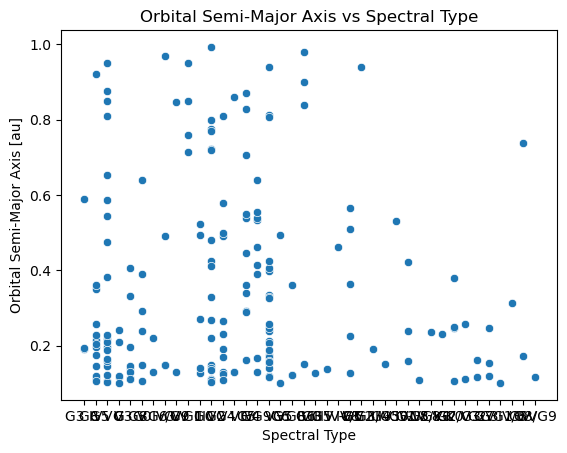

In [584]:
# 2. Ratio of Semi-Major Axis to Stellar Radius:
# For an exoplanet to be considered habitable, the ideal distance between the planet and the star is 0.1 au to 1.0 au
semi_major = g_type[(g_type['Orbit Semi-Major Axis [au]'] > 0.1) & (g_type['Orbit Semi-Major Axis [au]'] < 1.0)]
sns.scatterplot(x = semi_major['Spectral Type'], y = semi_major['Orbit Semi-Major Axis [au]'])
plt.title("Orbital Semi-Major Axis vs Spectral Type")
plt.xlabel("Spectral Type")
plt.ylabel('Orbital Semi-Major Axis [au]')
plt.show()

In [585]:
'''
Unfortunately, after applying most of the other filters, I was not able to attain much data to be able to plot on a graph, so I used one final filter 
that still yielded a reasonable amount of data.
'''

'\nUnfortunately, after applying most of the other filters, I was not able to attain much data to be able to plot on a graph, so I used one final filter \nthat still yielded a reasonable amount of data.\n'

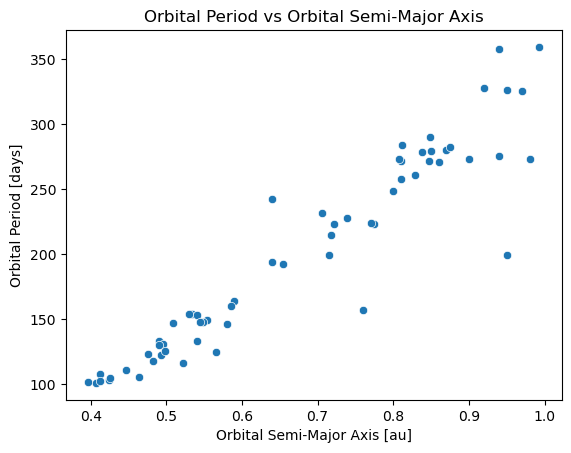

In [586]:
# 7. Rotation Period
# The orbital period of a potentially habitable exoplanet would range between 100 and 800 Earth days.
orb_per = semi_major[(semi_major['Orbital Period [days]'] > 100) & (semi_major['Orbital Period [days]'] < 800)]
orb_per['Orbital Period [days]']
sns.scatterplot(x = orb_per['Orbit Semi-Major Axis [au]'], y = orb_per['Orbital Period [days]'])
plt.title("Orbital Period vs Orbital Semi-Major Axis")
plt.xlabel("Orbital Semi-Major Axis [au]")
plt.ylabel('Orbital Period [days]')
plt.show()

In [587]:
mean_sm = orb_per['Orbit Semi-Major Axis [au]'].mean()
std_dev_sm = orb_per['Orbit Semi-Major Axis [au]'].std()
print("Mean semi-major axis:", mean_sm)
print("Standard Deviation of semi-major axis:", std_dev_sm)

mean_op = orb_per['Orbital Period [days]'].mean()
std_op = orb_per['Orbital Period [days]'].std()
print("Mean Orbital Period:", mean_op)
print("Standard Deviation of Orbital Period", std_op)

Mean semi-major axis: 0.6753055737704918
Standard Deviation of semi-major axis: 0.18381851891221943
Mean Orbital Period: 200.3586972131148
Standard Deviation of Orbital Period 75.74343462707758


In [588]:
num_random_points = 100
random_points = {'x': np.random.normal(0.68, 0.184, num_random_points), 'y': np.random.normal(200.35, 75.74, num_random_points)}
random_df = pd.DataFrame(random_points)
orb_per = pd.concat([orb_per, random_df], ignore_index=True)

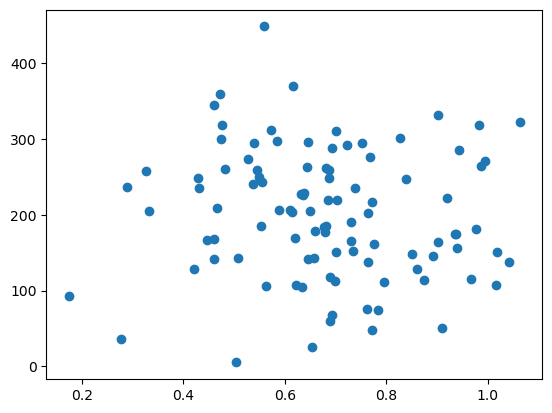

In [589]:
plt.scatter(random_points['x'], random_points['y'])

In [590]:
num_random_points = 100
random_points = {'x': np.random.normal(0.68, 0.184, num_random_points), 'y': np.random.normal(200.35, 75.74, num_random_points)}
random_df = pd.DataFrame(random_points)
orb_per = pd.concat([orb_per, random_df], ignore_index=True)

def linear_model(x, a, b):
    return a * x + b

def quadratic(x, a, b, c):
    return a * (x ** 2) + b * x + c
# Step 5: Clean data (remove NaN or Inf values before fitting)
df_clean = orb_per.dropna(subset=['x', 'y'])  # Drop NaN values
df_clean = df_clean[np.isfinite(df_clean['x']) & np.isfinite(df_clean['y'])]  # Drop Inf values

# Step 6: Fit the exponential curve to the clean data (ignoring outliers for the fit)
try:
    popt, pcov = fit.curve_fit(quadratic, orb_per['Orbit Semi-Major Axis [au]'].dropna(), orb_per['Orbital Period [days]'].dropna(), p0=(-491.55334327748, -264.645, 137.606))
except RuntimeError:
    print("Curve fitting failed. Try adjusting the initial guess.")
popt

array([ -8.74840857, 401.72477607, -66.64792301])

In [591]:
pcov

array([[ 15282.1148008 , -20987.92267032,   6696.13617941],
       [-20987.92267032,  29132.94724972,  -9404.81938086],
       [  6696.13617941,  -9404.81938086,   3085.1541331 ]])

[-61.36236038 -56.35813487 -51.35662898 -46.35784273 -41.3617761
 -36.3684291  -31.37780173 -26.38989399 -21.40470588 -16.42223739
 -11.44248854  -6.46545931  -1.49114971   3.48044026   8.4493106
  13.41546131  18.37889239  23.33960385  28.29759568  33.25286788
  38.20542045  43.15525339  48.1023667   53.04676039  57.98843444
  62.92738887  67.86362367  72.79713884  77.72793438  82.65601029
  87.58136658  92.50400324  97.42392026 102.34111766 107.25559543
 112.16735358 117.07639209 121.98271098 126.88631023 131.78718986
 136.68534986 141.58079023 146.47351098 151.36351209 156.25079358
 161.13535543 166.01719766 170.89632026 175.77272323 180.64640658
 185.51737029 190.38561438 195.25113883 200.11394366 204.97402886
 209.83139444 214.68604038 219.53796669 224.38717338 229.23366044
 234.07742787 238.91847567 243.75680384 248.59241238 253.4253013
 258.25547059 263.08292024 267.90765027 272.72966068 277.54895145
 282.36552259 287.17937411 291.99050599 296.79891825 301.60461088
 306.40758389

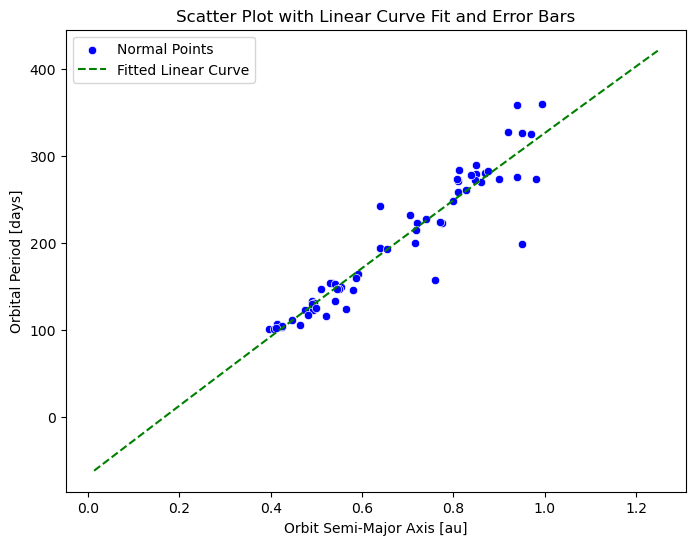

In [592]:
plt.figure(figsize=(8, 6))

# Plot normal points
sns.scatterplot(data=orb_per, x = orb_per['Orbit Semi-Major Axis [au]'], y = orb_per['Orbital Period [days]'], label='Normal Points', color='blue')

# Plot outliers
#sns.scatterplot(data=orb_per, x = orb_per['Orbit Semi-Major Axis [au]'], y = orb_per['Orbital Period [days]'], label='Outliers', color='red')

# Plot the fitted linear curve
x_vals = np.linspace(orb_per['x'].min(), orb_per['x'].max(), 100)
y_vals = quadratic(x_vals, *popt)
print(y_vals)
plt.plot(x_vals, y_vals, label="Fitted Linear Curve", color='green', linestyle='--')
plt.title("Scatter Plot with Linear Curve Fit and Error Bars")
plt.legend()
plt.show()

In [593]:
orb_per['Orbit Semi-Major Axis [au]'].dropna() 

0     0.4760
1     0.4900
2     0.7600
3     0.4929
4     0.7150
       ...  
56    0.8070
57    0.8280
58    0.8470
59    0.8380
60    0.4123
Name: Orbit Semi-Major Axis [au], Length: 61, dtype: float64

In [594]:
orb_per['Orbital Period [days]'].dropna()


0     123.0100
1     133.7100
2     157.5700
3     122.7600
4     199.6800
        ...   
56    273.6900
57    260.7900
58    271.9445
59    278.5900
60    102.5400
Name: Orbital Period [days], Length: 61, dtype: float64

(0.4760, 123.0100) (.993, 359.51) (0.7150, 199.6800)

C:\Users\Kayhan Kolhatkar\AppData\Local\Temp\ipykernel_22952\442817575.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  popt, pcov = fit.curve_fit(linear_model, df_clean[~outliers]['x'], df_clean[~outliers]['y'], p0=(320, 100))
C:\Users\Kayhan Kolhatkar\AppData\Local\Temp\ipykernel_22952\442817575.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  popt, pcov = fit.curve_fit(linear_model, df_clean[~outliers]['x'], df_clean[~outliers]['y'], p0=(320, 100))


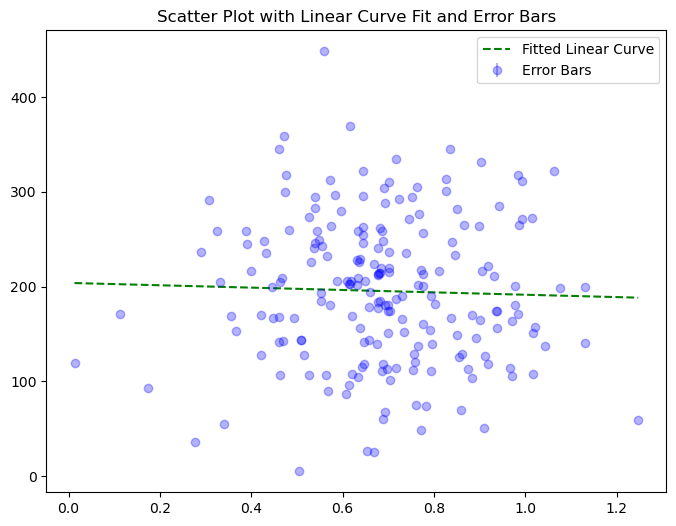

In [647]:
# Curve Fitting:


# Detect outliers (using Interquartile Range for simplicity)
Q1 = orb_per[['Orbit Semi-Major Axis [au]', 'Orbital Period [days]']].quantile(0.25)
Q3 = orb_per[['Orbit Semi-Major Axis [au]', 'Orbital Period [days]']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((orb_per[['Orbit Semi-Major Axis [au]', 'Orbital Period [days]']] < (Q1 - 1.5 * IQR)) | (orb_per[['Orbit Semi-Major Axis [au]', 'Orbital Period [days]']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Step 4: Exponential model function
def linear_model(x, a, b):
    return a * x + b

# Step 5: Clean data (remove NaN or Inf values before fitting)
df_clean = orb_per.dropna(subset=['x', 'y'])  # Drop NaN values
df_clean = df_clean[np.isfinite(df_clean['x']) & np.isfinite(df_clean['y'])]  # Drop Inf values

# Step 6: Fit the exponential curve to the clean data (ignoring outliers for the fit)
try:
    popt, pcov = fit.curve_fit(linear_model, df_clean[~outliers]['x'], df_clean[~outliers]['y'], p0=(320, 100))
except RuntimeError:
    print("Curve fitting failed. Try adjusting the initial guess.")

popt


# Get the fitted values
orb_per['y_fit'] = linear_model(orb_per['Orbit Semi-Major Axis [au]'], *popt)

# Step 6: Calculate residuals and error bars (standard deviation of the residuals)
residuals = orb_per['y'] - orb_per['y_fit']
std_dev = np.std(residuals)

# Step 7: Plotting
plt.figure(figsize=(8, 6))

# Plot normal points
#sns.scatterplot(data=orb_per[~outliers], x = orb_per['Orbit Semi-Major Axis [au]'], y = orb_per['Orbital Period [days]'], label='Normal Points', color='blue')

# Plot outliers
sns.scatterplot(data=orb_per[outliers], x = orb_per[outliers]['Orbit Semi-Major Axis [au]'], y = orb_per[outliers]['Orbital Period [days]'], label='Outliers', color='red')

# Plot the fitted linear curve
x_vals = np.linspace(orb_per['x'].min(), orb_per['x'].max(), 100)
y_vals = linear_model(x_vals, *popt)
plt.plot(x_vals, y_vals, label="Fitted Linear Curve", color='green', linestyle='--')

# Add error bars (using standard deviation of residuals)
plt.errorbar(orb_per['x'], orb_per['y'], yerr=std_dev, fmt='o', color='blue', alpha=0.3, label="Error Bars")

plt.title("Scatter Plot with Linear Curve Fit and Error Bars")
plt.legend()
plt.show()
